# TP LABORATORIO
### Juan Ignacio Jimenez Copati

Para este trabajo práctico de laboratorio, se nos pidió diseñar cierto tipo de filtro activo. Nuestro grupo eligió un **filtro chebyshev** con las siguientes restricciones de plantila:

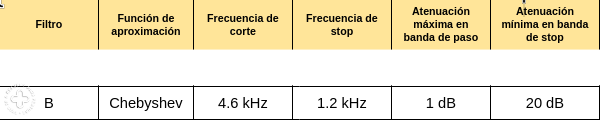

Para el mismo, se hizo el análisis detallado a continuación:

In [8]:
from IPython.display import IFrame
IFrame("../Análisis_papel/TP_LAB.pdf", width=960, height=1000)

En el análisis se obtuvo la función transferencia, diagrama de polos y ceros y el valor de los componentes de nuestro circuito. El mismo, se realizó con un circuito integrado UAF42.

Para confirmar los cálculos realizados anteriormente se simuló contando con las restricciones de plantilla:

## *Análisis numérico*

### *OBTENCIÓN DE FUNCIÓN TRANSFERENCIA*

In [2]:
#%% Librerías externas NumPy, SciPy y Matplotlib
from scipy import signal as sig  
import matplotlib.pyplot as plt               #le doy un nombre (plt) al matplotlib para usarlo más comodamente
import numpy as np                            #le doy un nombre (np) al numpy para usarlo más comodamente
import math as m

import pandas as pd

##### Librería de TC2
from pytc2.general import print_latex, print_subtitle
import pytc2.sistemas_lineales as tc2 #libreria de la catedra.

#Para graficos

import matplotlib as mpl

fig_sz_x = 13
fig_sz_y = 7
fig_dpi = 80 # dpi
fig_font_size = 16

mpl.rcParams['figure.figsize'] = (fig_sz_x, fig_sz_y)
mpl.rcParams['figure.dpi'] = fig_dpi
mpl.rcParams.update({'font.size':fig_font_size})

In [3]:
#%%

# Defino mi plantilla pasa altos

fs=1200
fp=4600
a_MAX=1
a_min=20

ws=fs*2*m.pi
wp=fp*2*m.pi

print_subtitle('Frecuencias normalizadas del pasa altos')

wp_n=1      # wp/wp
ws_n=ws/wp

print("Frecuencia paso HP:",wp_n)
print("Frecuencia stop HP:",ws_n)
#Defino mi plantilla pasa bajos prototipo aplicando transformación de frecuencias

zp_n=1
zs_n=1/ws_n

print_subtitle('Frecuencias normalizadas del pasa bajos')

print("Frecuencia paso LP:",zp_n)
print("Frecuencia stop LP:",zs_n)


#### Frecuencias normalizadas del pasa altos

Frecuencia paso HP: 1
Frecuencia stop HP: 0.2608695652173913


#### Frecuencias normalizadas del pasa bajos

Frecuencia paso LP: 1
Frecuencia stop LP: 3.8333333333333335


In [4]:
#%%

# Averiguo epsilon y 'n'

eps = m.sqrt(10**(a_MAX/10)-1)
n , z3db = sig.cheb1ord(zp_n, zs_n, a_MAX, a_min, True)

print_subtitle('Parámetros obtenidos')

print("Epsilon: ", eps)
print("Orden: ", n)

#%%

# Diseño de cheby con esos parámetros

z,p,k = sig.cheb1ap(n, a_MAX)
LP_SOS = sig.zpk2sos(z, p, k)

print_subtitle('TRANSFERENCIA PASA BAJOS PROTOTIPO')

tc2.pretty_print_SOS(LP_SOS)

#### Parámetros obtenidos

Epsilon:  0.5088471399095875
Orden:  2


#### TRANSFERENCIA PASA BAJOS PROTOTIPO

<IPython.core.display.Math object>

In [5]:
# Transformo mi pasa bajos a pasa altos

num_lp , den_lp = sig.zpk2tf(z, p, k)

num_hp , den_hp = sig.lp2hp(num_lp, den_lp)

HP_SOS = sig.tf2sos(num_hp, den_hp)

print_subtitle('TRANSFERENCIA PASA ALTOS')

tc2.pretty_print_SOS(HP_SOS)


#### TRANSFERENCIA PASA ALTOS

<IPython.core.display.Math object>

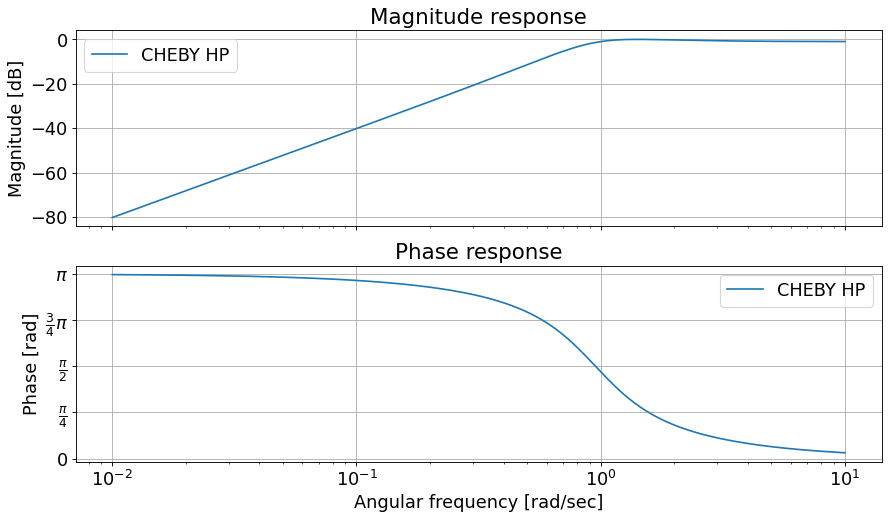

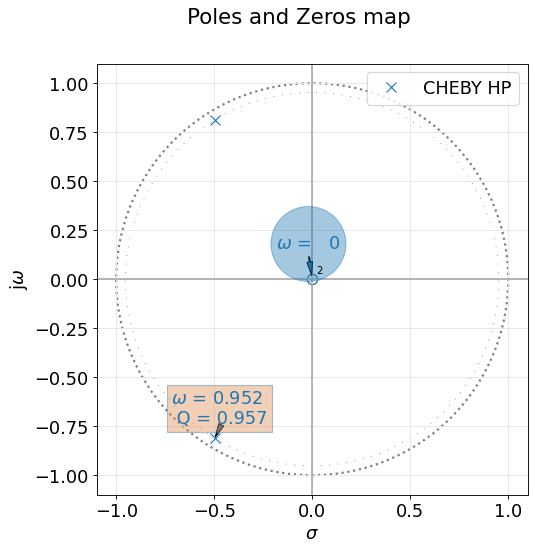

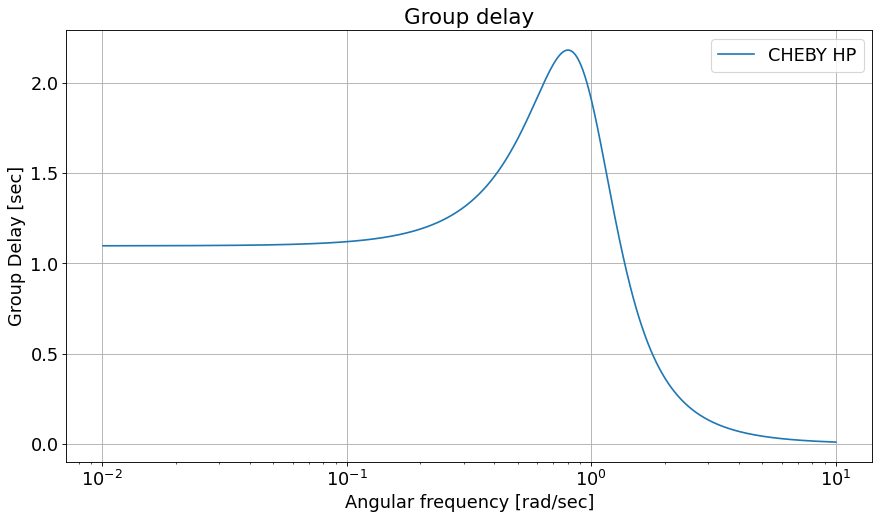

In [6]:
# Corro los gráficos para verificar las condiciones de plantilla

H1 = sig.TransferFunction(num_hp, den_hp)

tc2.analyze_sys(H1, 'CHEBY HP')

Si hacemos un acercamiento a las zonas críticas y con ayuda del cursor, se puede ver que las condiciones de plantilla se cumplieron.

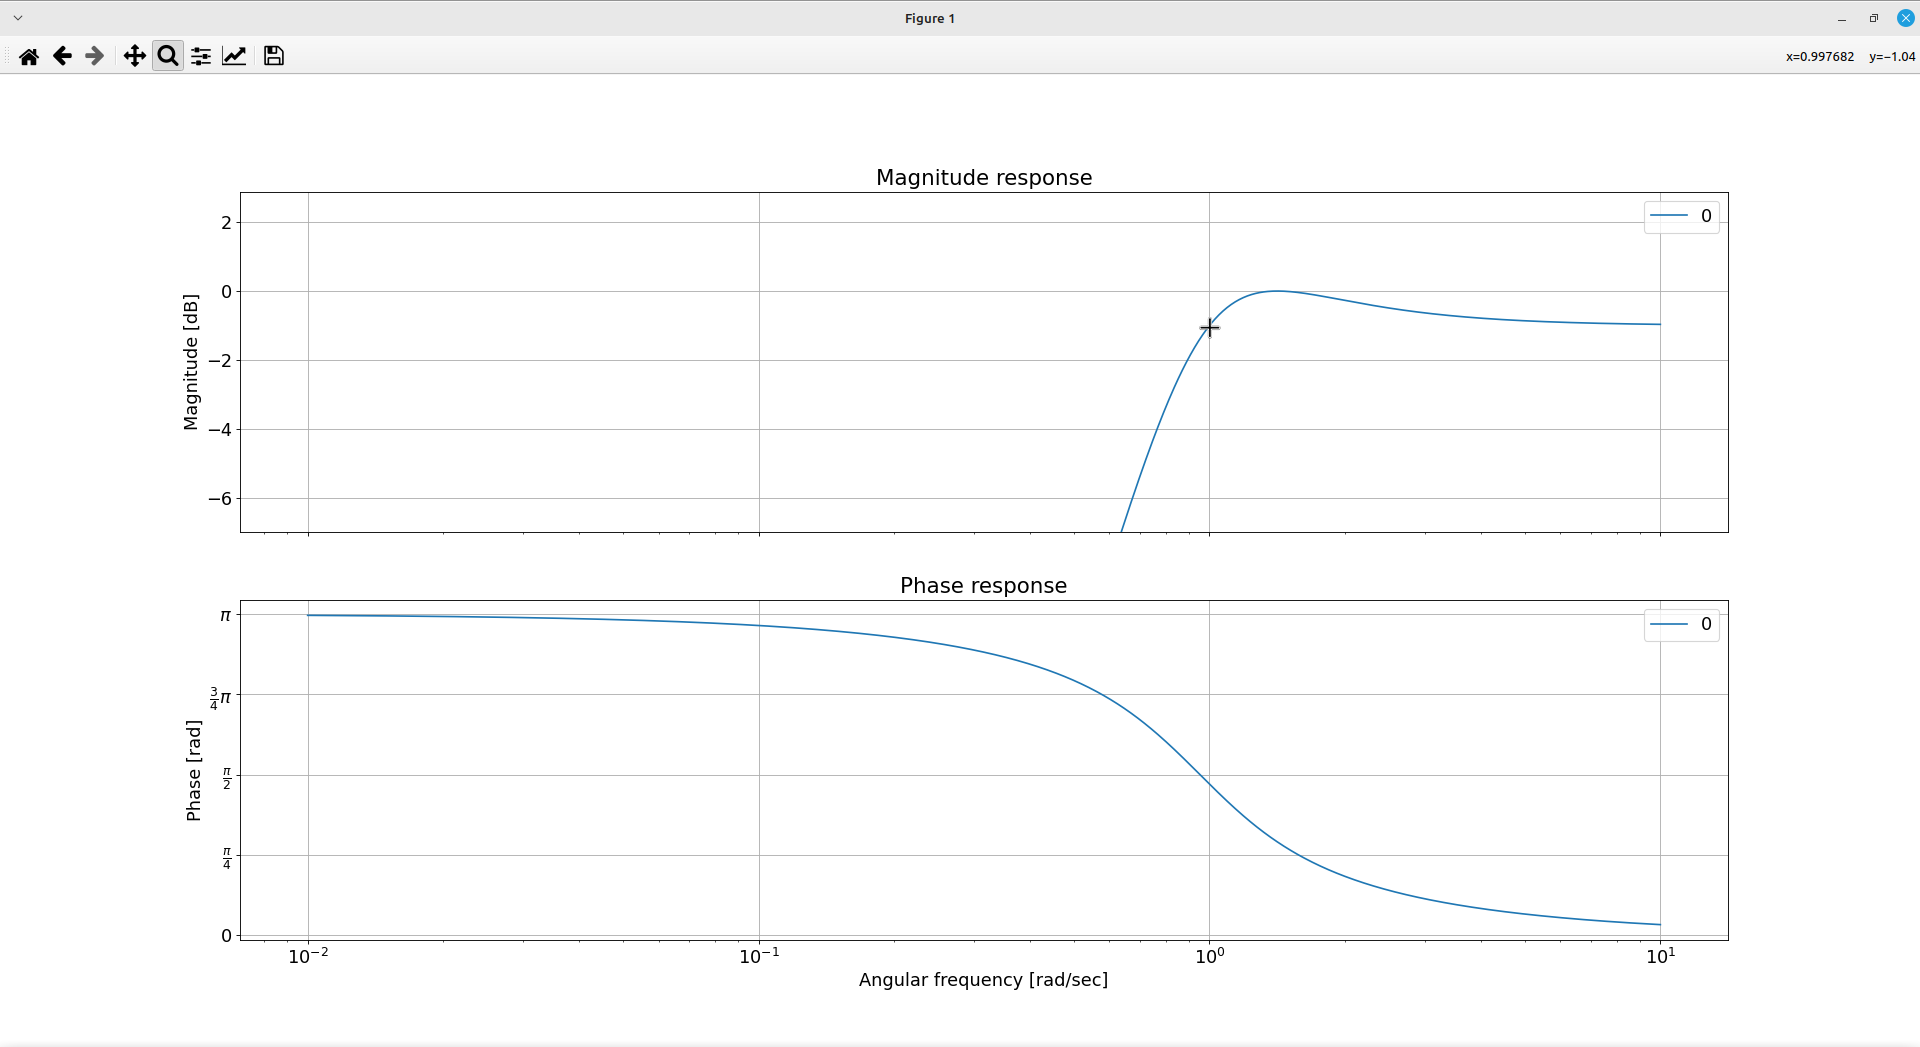

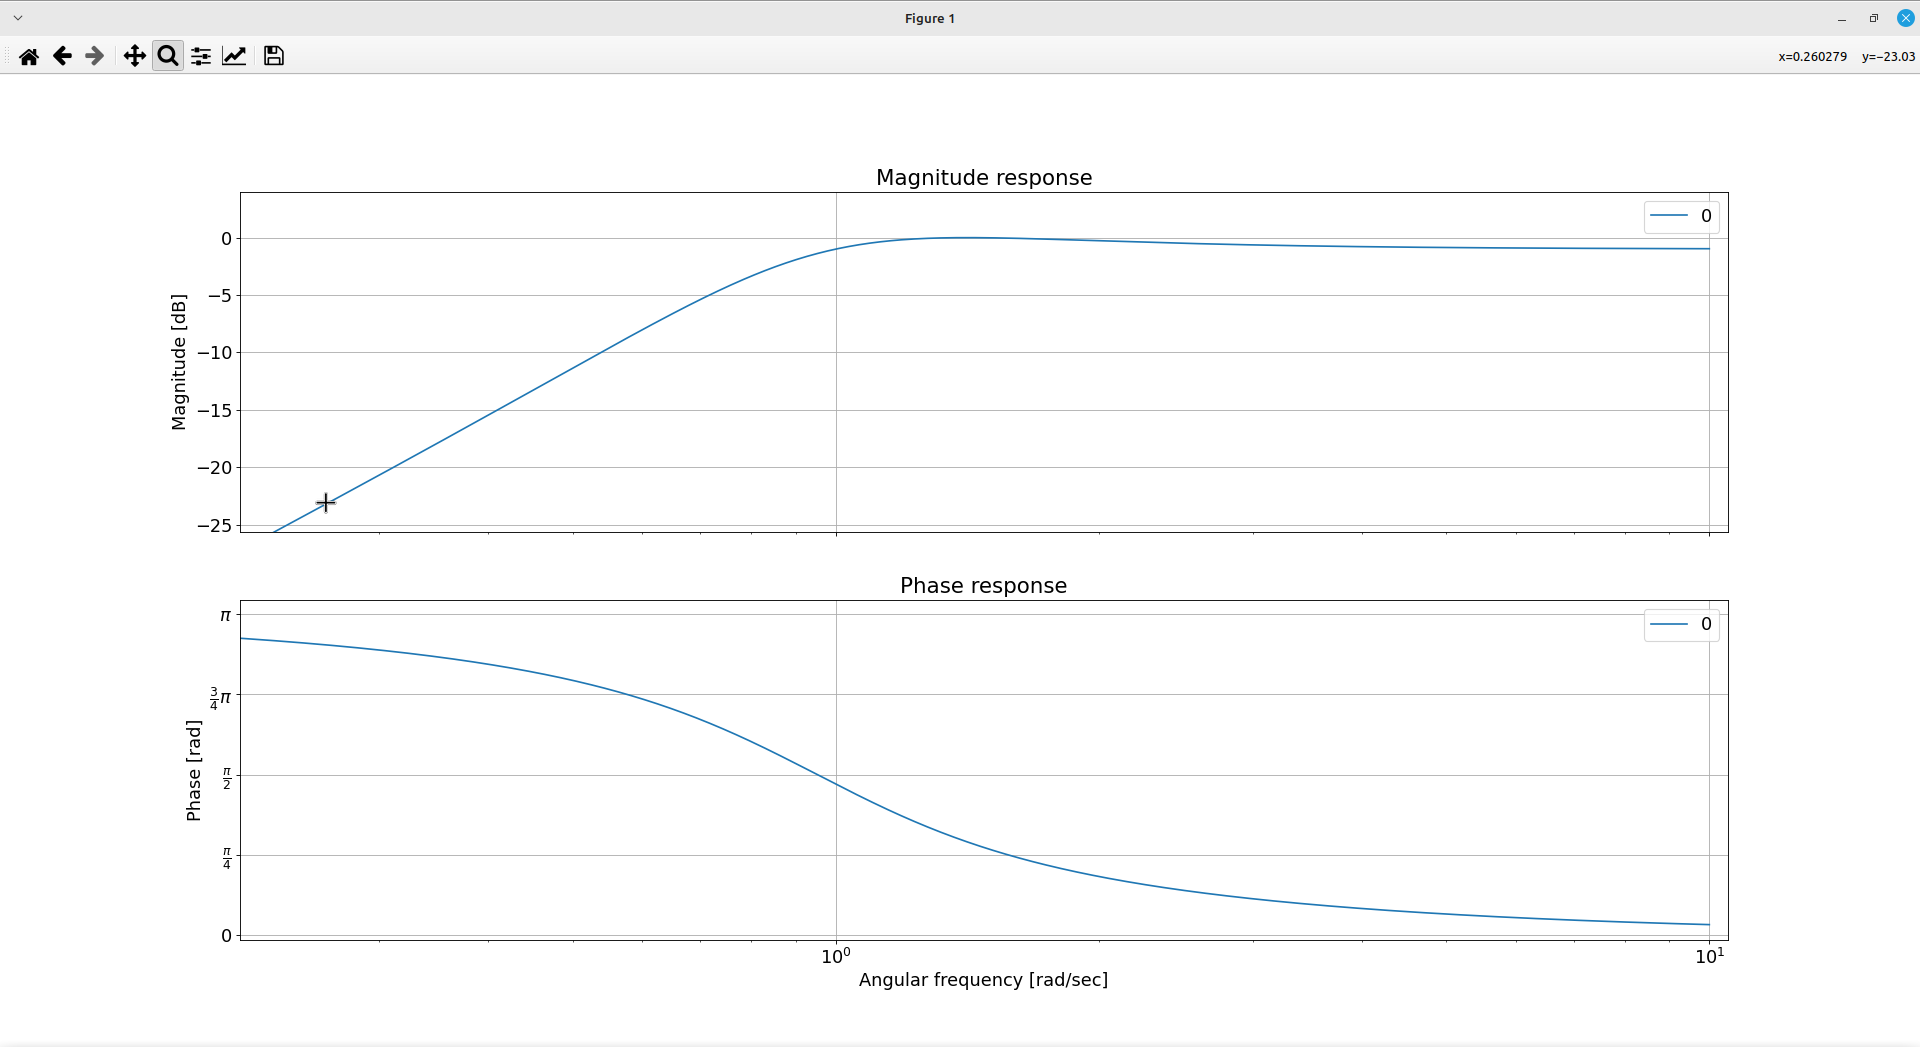

Se ve que para la frecuencia normalizada de paso se tiene una atenuación de -1dB y que para la frecuencia de stop se tiene una atenuación de -23dB, menor a -20dB.

## *Simulación circuital*

Primero se procederá con la simulación del circuito con valores ideales:

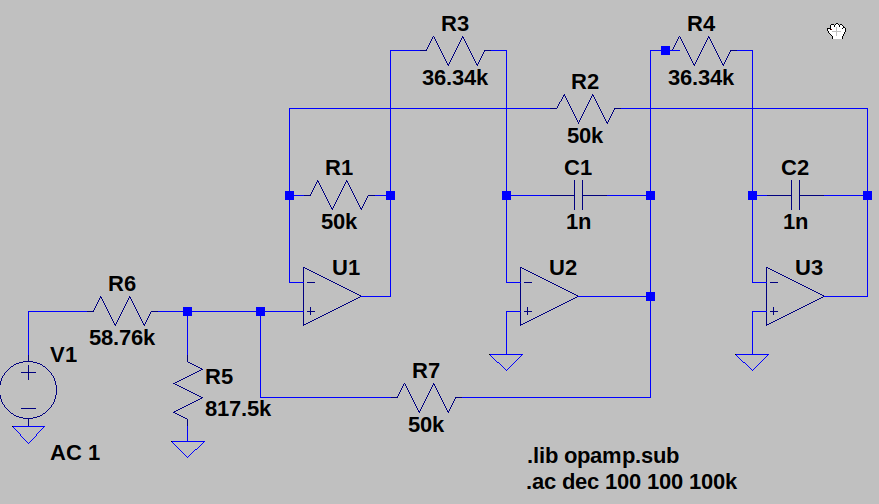

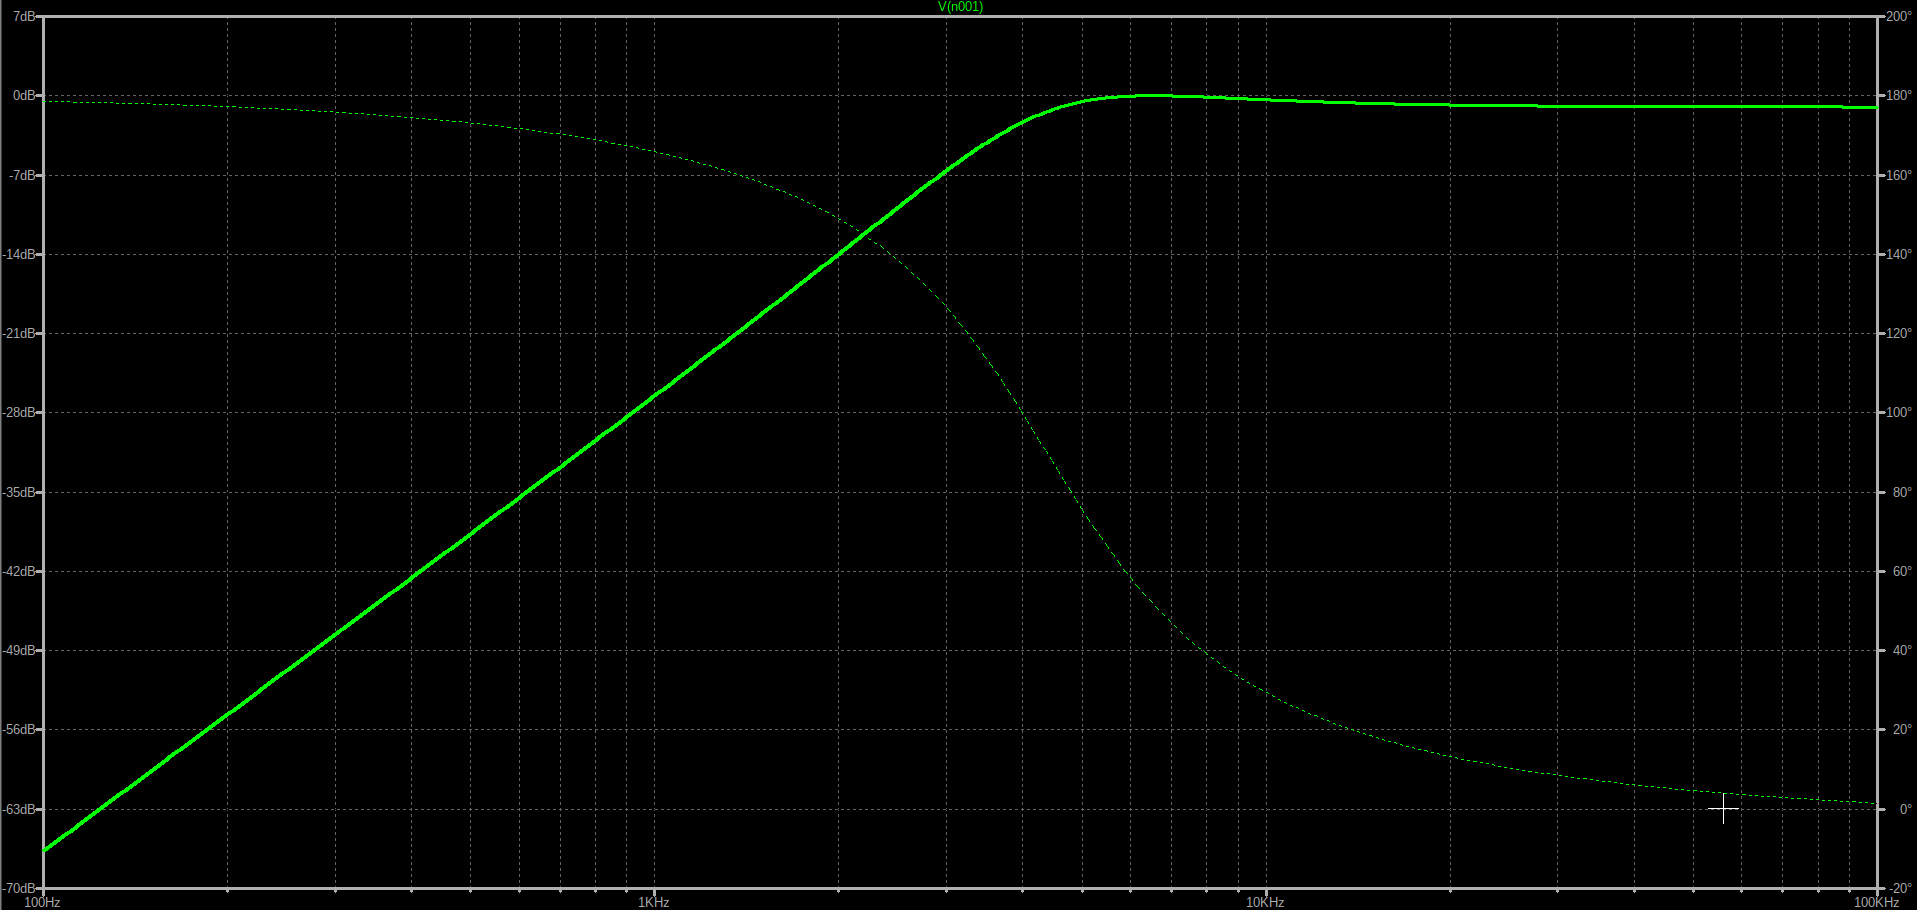

Se ve que la forma de pasa altos se consiguió, pero para chequear los puntos se analizará con los cursores los puntos críticos:

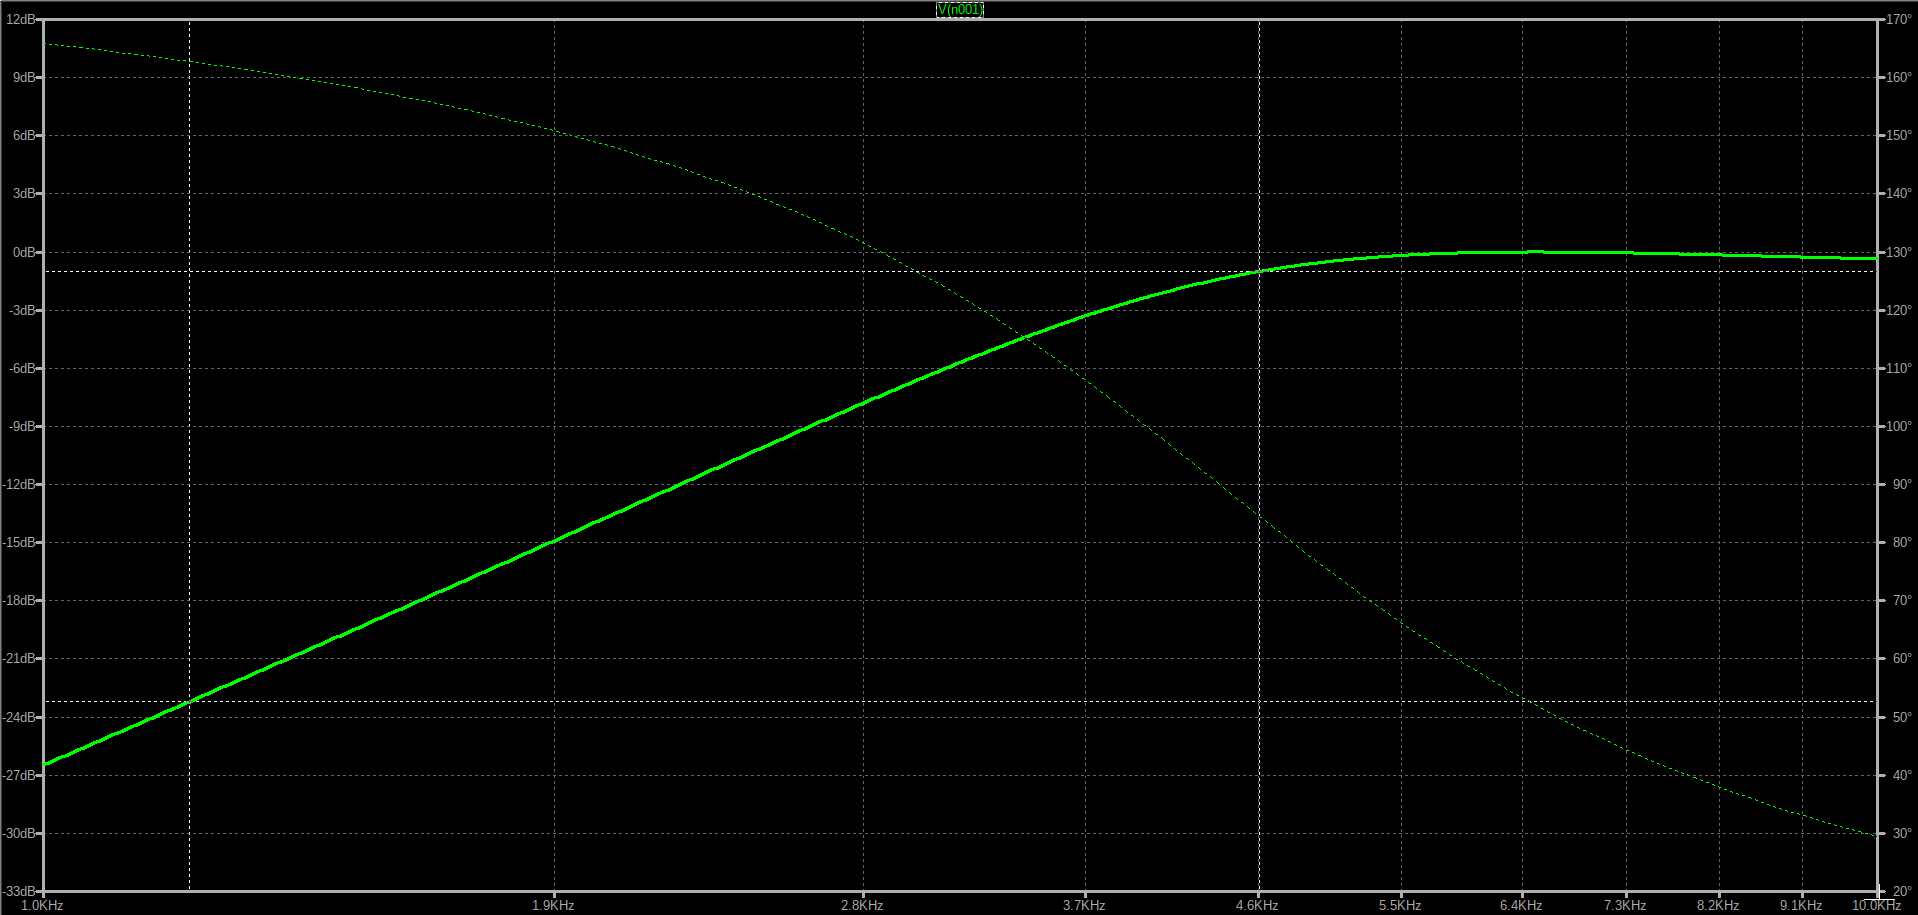

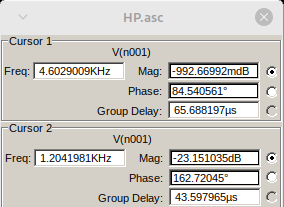

Como se puede ver, para la frecuencia de 4600Hz se tiene el mácimo de atenuación (-1dB) y para frecuencias más altas el módulo se mantiene entre los 0dB y los -1dB. Luego, la frecuencia de stop es 1200Hz, para la cual se pedía una atenuación mínima de -20dB. Vemos que esa condición se sigue cumpliendo ya que el cursor marca -23dB.

A continuación se simulará el circuitos con valores comerciales de resistencia con el fin de saber qué tanto se dispersan los parámetros de mi plantilla en función de las mismas:

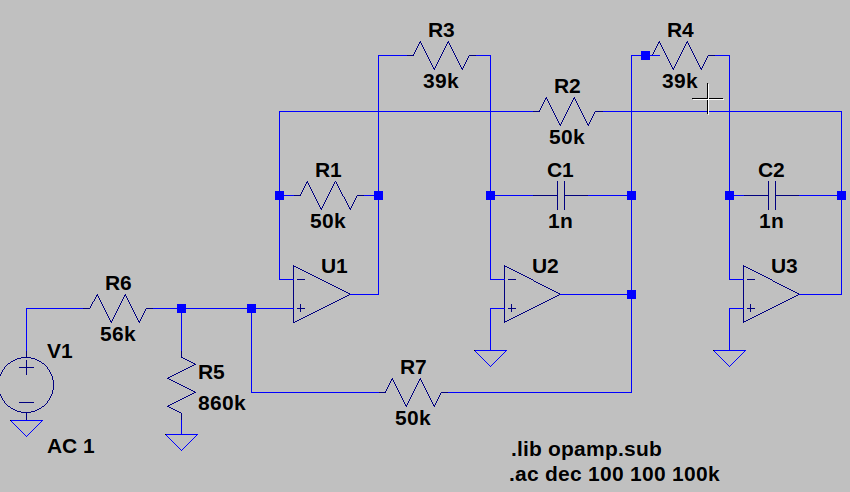

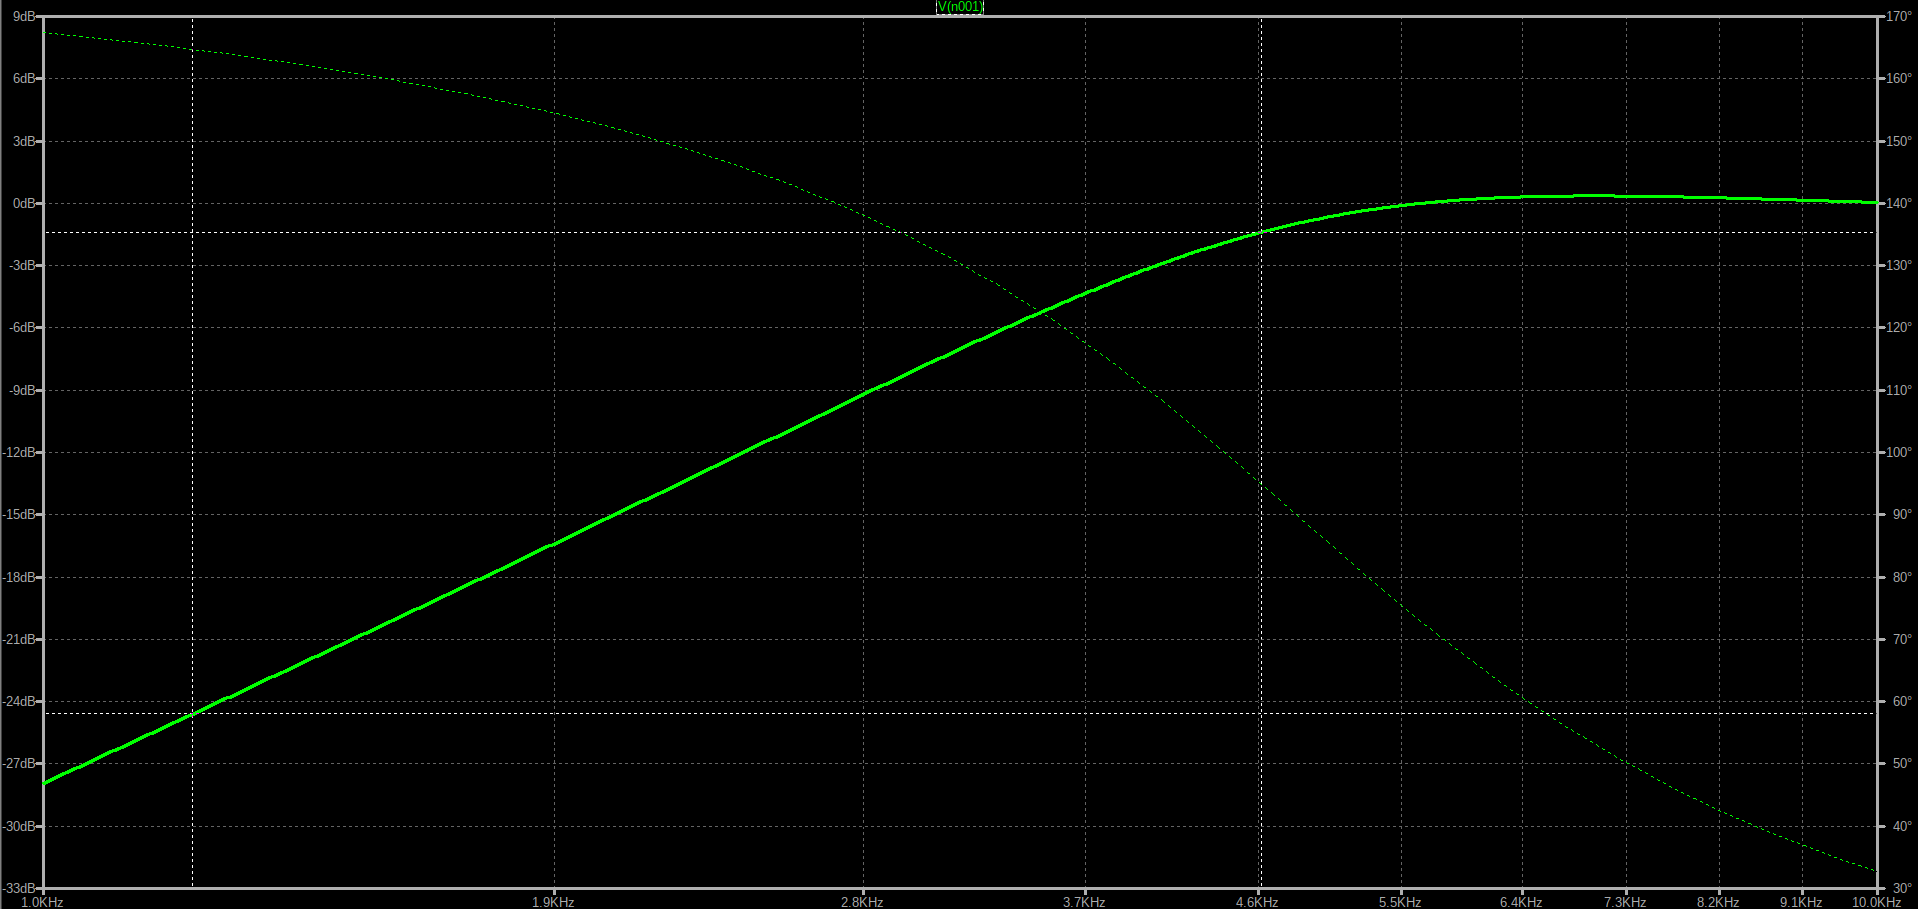

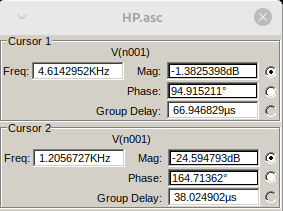

A pesar de que a la frecuencia de stop se sigue cumpliendo con la condición de -20dB, la frecuencia de corte cuenta con una atenuación de -1.3dB aprox. Este valor será ajustado con los presets que se agregarán al PCB en serie a las resistencias.

Más allá de estas pequeñas dispersiones, el filtro cumple con las restricciones casi a la perfección. A continuación se llevará a cabo el detalle de la confección de la plaqueta en donde se encontrará el filtro.

## *CONFECCIÓN DE PLACA*

### *Esquemático*

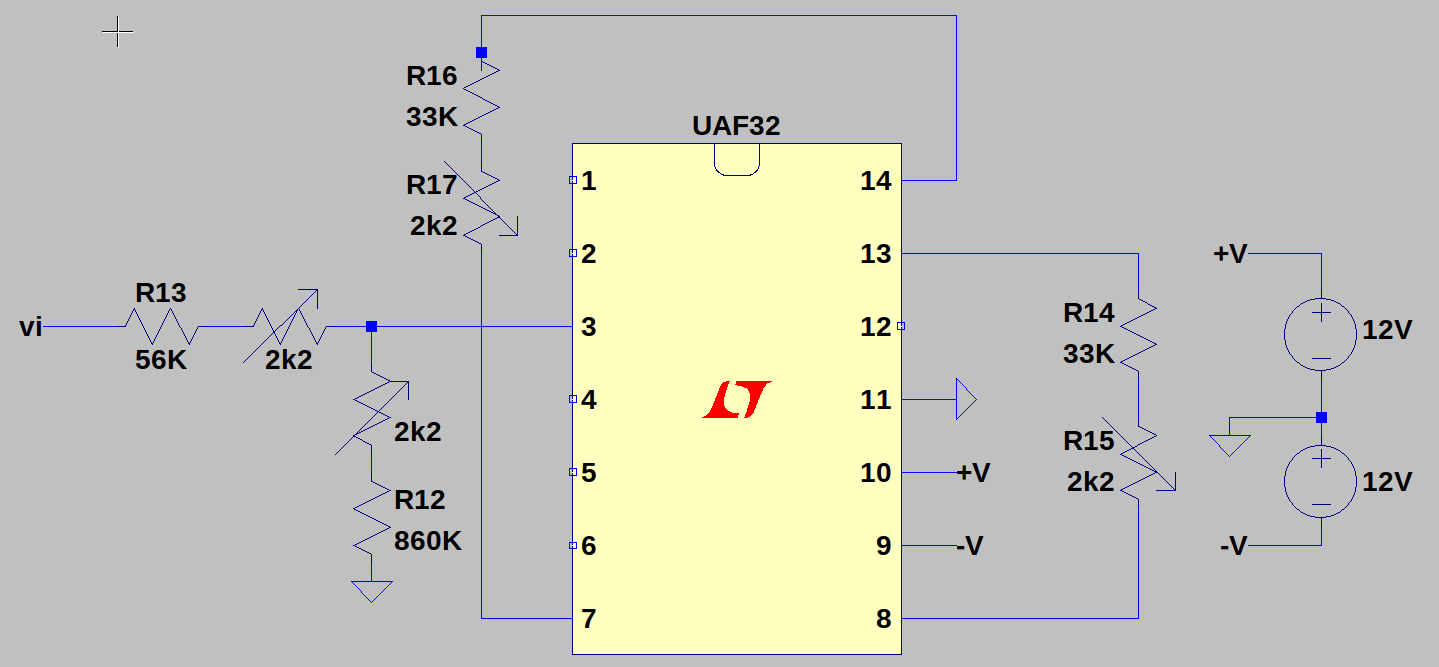

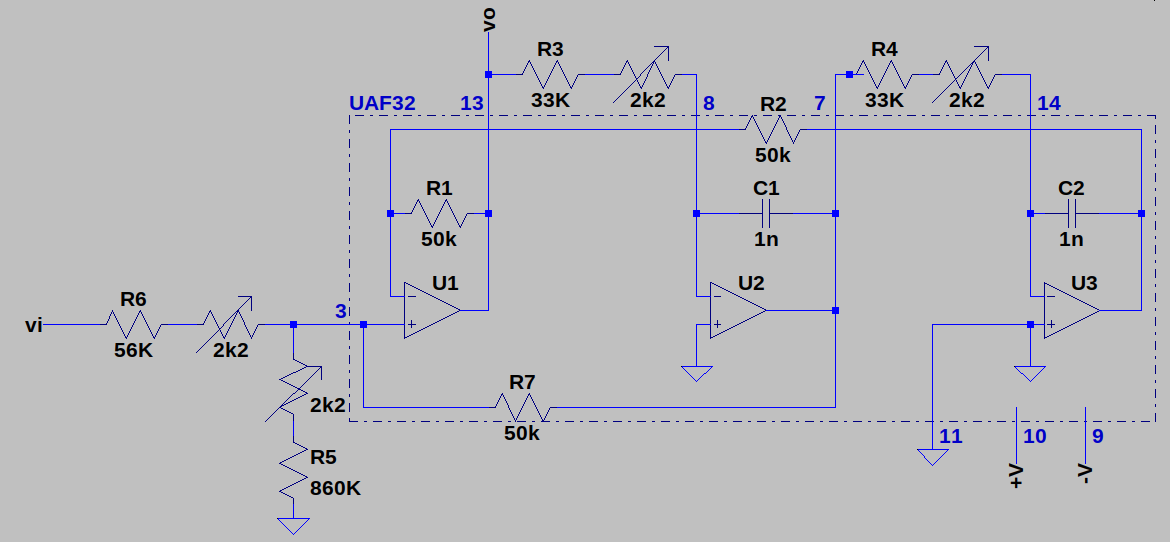

El esquemático se realizó con los valores comerciales ya que son los que se usarán en el PCB. La BOM de los componentes utilizados se detalla a continuación:

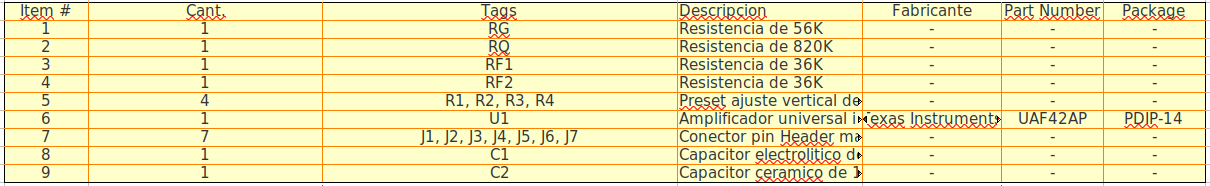

Y la placa una vez soldada queda de la siguiente manera:

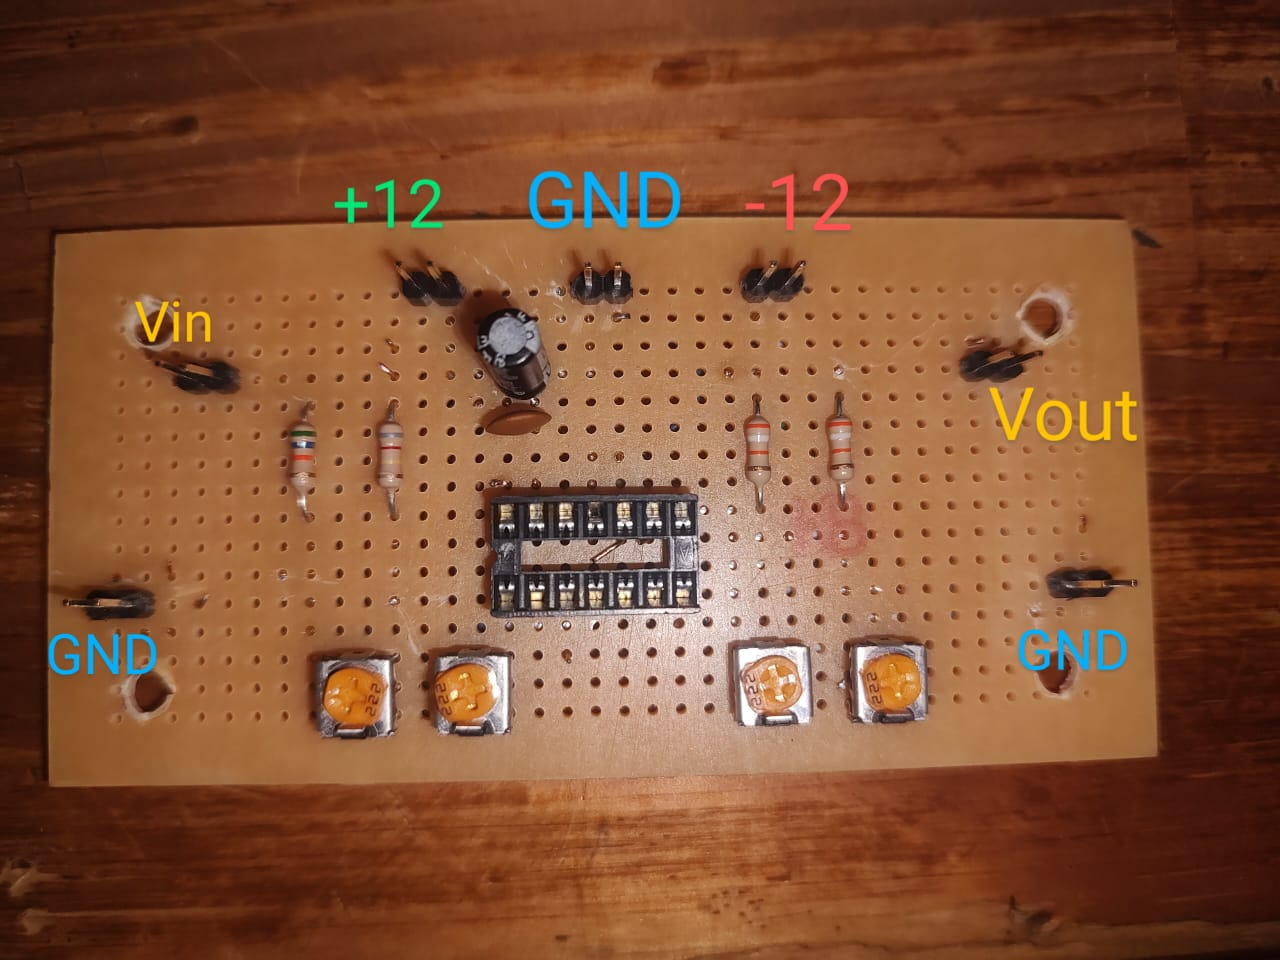

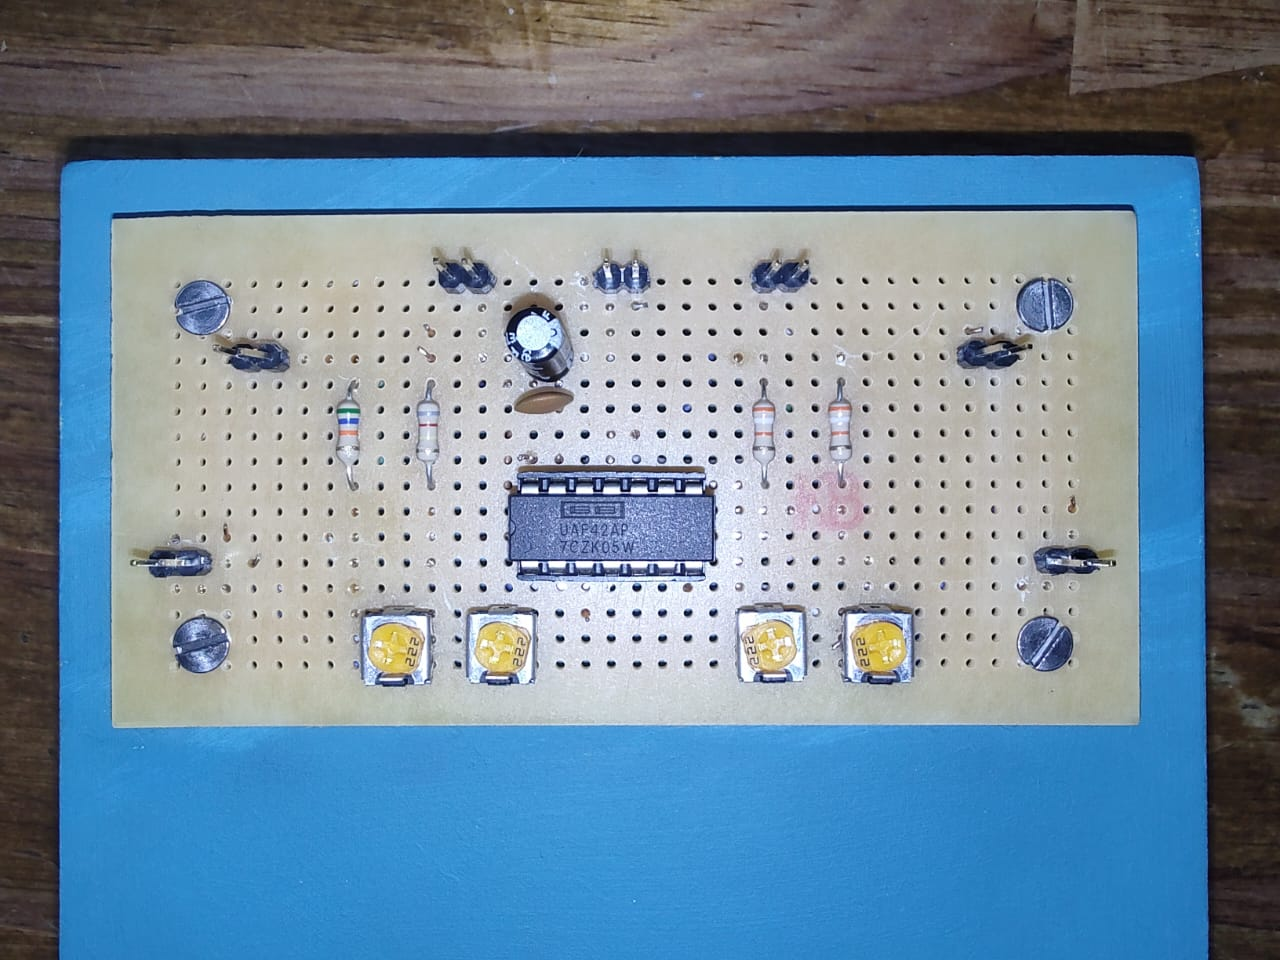

Para hacerla, se implementó con una placa universal cuyas pistas fueron formadas con estaño y cables. Dispusimos las entradas a la izquierda y las salidas a la derecha, siguiendo la lógica común. Además pusimos los terminales de alimentación en la parte superior. Añadimos presets para corregir el valor de las resistencias si es necesario y agregamos capacitores para tener una señal de entrada con menor ruido. Por último, la pĺaca está montada sobre una plataforma de madera y suspendida sobre 4 patas de metal, para aislarla de cualquier contacto con el entorno a la hora de medir.

## *MEDICIONES*

A

### *VISUALIZACIÓN DE LOS RESULTADOS DEL ANALIZADOR DE ESPECTRO*

Luego, muestro los .jpeg que me dio el analizador de espectro para comparar las formas.

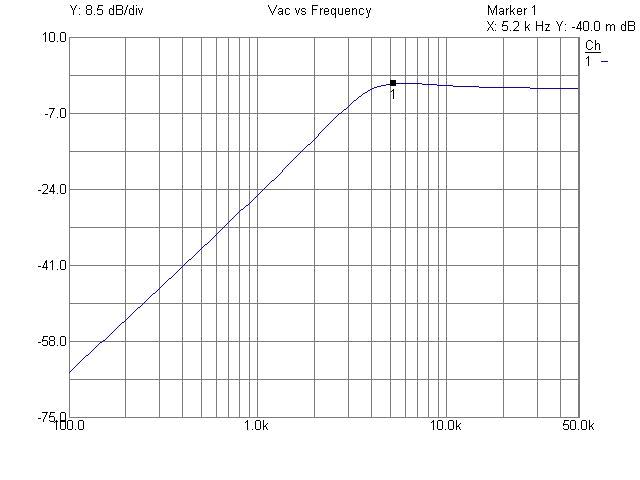

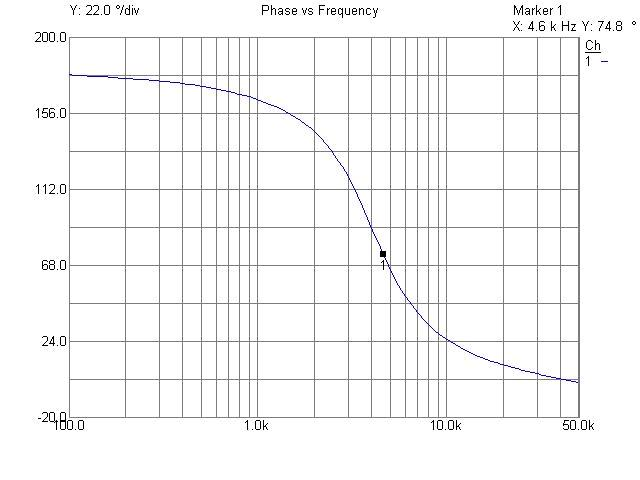

Se ven que los gráficos coinciden con los obtenidos con el osciloscopio. ω0 puede observarse marcada en el gráfico de fase y su valor es 4,6KHz. 

A continuación se planea plotear lo mismo a partir del archivo .csv que me provee el analizador

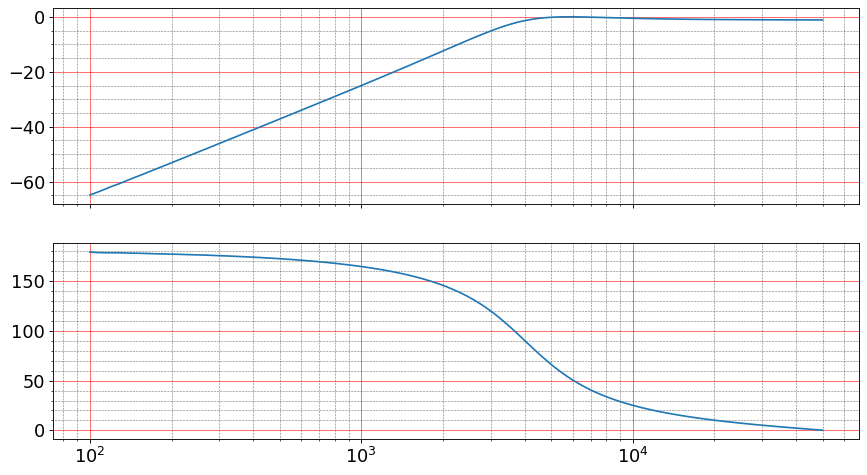

In [7]:
data1 = pd.read_csv('MODULO.csv', delimiter=',')
data2 = pd.read_csv('FASE.csv', delimiter=',')

data1_frec = data1['Frec']
data1_mod = data1['Volt']

data2_frec = data2['Frec']
data2_fase = data2['Fase']

fig, (ax1,ax2) = plt.subplots(2, 1, sharex=True)

ax1.semilogx(data1_frec, data1_mod)
ax1.grid(True)
ax1.minorticks_on()
# Customize the major grid
ax1.grid(which='major', linestyle='-', linewidth='0.5', color='red')
# Customize the minor grid
ax1.grid(which='minor', linestyle=':', linewidth='0.5', color='black')

ax2.semilogx(data2_frec, data2_fase)
ax2.grid(True)
ax2.minorticks_on()
# Customize the major grid
ax2.grid(which='major', linestyle='-', linewidth='0.5', color='red')
# Customize the minor grid
ax2.grid(which='minor', linestyle=':', linewidth='0.5', color='black')

plt.show()